Running Strategy: SmaCross
Initializing Strategy...
Executing Ticks...
Tick 62: Executing Buy Order
Tick 84: Executing Sell Order
Tick 96: Executing Buy Order
Tick 97: Executing Sell Order
Tick 98: Executing Buy Order
Tick 99: Executing Sell Order
Strategy Execution Completed


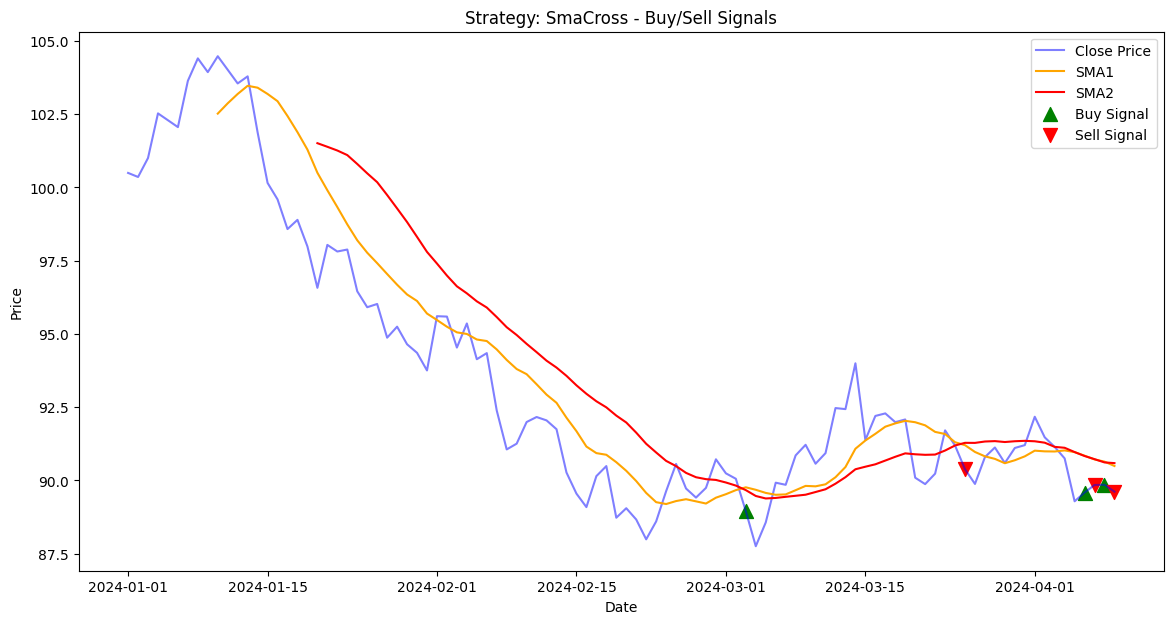

In [11]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

class Strategy:
    def __init__(self, strategy_config, stock_data):
        self.strategy_name = strategy_config['strategy_name']
        self.stocks = strategy_config['stocks']
        self.parameters = strategy_config['parameters']
        self.init_instructions = strategy_config['init']
        self.tick_instructions = strategy_config['ticks']
        self.indicators = {}
        self.positions = []
        self.stock_data = stock_data  # Simulated stock data
        self.current_tick = 0
        self.signals = []  # To store buy/sell signals
        self.buy_plotted = False
        self.sell_plotted = False

    def set_indicator(self, name, indicator_type, input_data, period):
        if indicator_type == "SMA":
            # Calculate the Simple Moving Average using pandas
            self.indicators[name] = self.stock_data[input_data].rolling(window=period).mean()

    def get_indicator(self, name):
        # Return the current value of the indicator at the current tick
        return self.indicators.get(name, [None])[self.current_tick]

    def evaluate_condition(self, condition):
        condition_type = condition['type']
        left = self.get_indicator(condition['left'])
        right = self.get_indicator(condition['right'])

        if left is None or right is None:
            return False  # If either indicator is None, skip the action

        if condition_type == "crosses_above":
            # Check for a crossover (simplified)
            if self.current_tick > 0:
                previous_left = self.indicators[condition['left']][self.current_tick - 1]
                previous_right = self.indicators[condition['right']][self.current_tick - 1]
                return previous_left <= previous_right and left > right

        return False

    def execute_init(self):
        for instruction in self.init_instructions:
            if instruction['action'] == "set":
                variable = instruction['variable']
                indicator_type = instruction['indicator']
                input_data = instruction['input']
                period = self.parameters[instruction['period']]
                self.set_indicator(variable, indicator_type, input_data, period)

    def execute_ticks(self):
        for tick in self.tick_instructions:
            condition = tick['condition']
            actions = tick['actions']
            if self.evaluate_condition(condition):
                for action in actions:
                    self.perform_action(action['action'])

    def perform_action(self, action):
        if action == "buy":
            print(f"Tick {self.current_tick}: Executing Buy Order")
            self.positions.append(("Buy", self.stock_data['close'][self.current_tick]))
            self.signals.append((self.stock_data['date'][self.current_tick], "Buy"))
        elif action == "sell":
            print(f"Tick {self.current_tick}: Executing Sell Order")
            self.positions.append(("Sell", self.stock_data['close'][self.current_tick]))
            self.signals.append((self.stock_data['date'][self.current_tick], "Sell"))

    def run_strategy(self):
        print(f"Running Strategy: {self.strategy_name}")
        print("Initializing Strategy...")
        self.execute_init()
        print("Executing Ticks...")

        # Simulate each tick in the stock data
        for self.current_tick in range(len(self.stock_data)):
            self.execute_ticks()

        print("Strategy Execution Completed")

    def plot_signals(self):
        plt.figure(figsize=(14, 7))
        plt.plot(self.stock_data['date'], self.stock_data['close'], label='Close Price', color='blue', alpha=0.5)
        plt.plot(self.stock_data['date'], self.indicators['sma1'], label='SMA1', color='orange')
        plt.plot(self.stock_data['date'], self.indicators['sma2'], label='SMA2', color='red')

        # Plot buy/sell signals
        for signal in self.signals:
            date, signal_type = signal
            if signal_type == "Buy" and not self.buy_plotted:
                plt.scatter(date, self.stock_data.loc[self.stock_data['date'] == date, 'close'], marker='^', color='green', s=100, label='Buy Signal')
                self.buy_plotted = True
            elif signal_type == "Sell" and not self.sell_plotted:
                plt.scatter(date, self.stock_data.loc[self.stock_data['date'] == date, 'close'], marker='v', color='red', s=100, label='Sell Signal')
                self.sell_plotted = True
            else:
                plt.scatter(date, self.stock_data.loc[self.stock_data['date'] == date, 'close'], marker='^' if signal_type == "Buy" else 'v', color='green' if signal_type == "Buy" else 'red', s=100)

        plt.title(f"Strategy: {self.strategy_name} - Buy/Sell Signals")
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()

# Generate Simulated Stock Data
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start="2024-01-01", periods=100, freq="D")
prices = np.cumsum(np.random.randn(100)) + 100  # Simulated random walk stock prices

stock_data = pd.DataFrame({
    'date': dates,
    'close': prices
})

# Example JSON strategy configuration
strategy_json = '''
{
  "strategy_name": "SmaCross",
  "stocks": ["APPL"],
  "parameters": {
    "n1": 10,
    "n2": 20
  },
  "init": [
    {
      "action": "set",
      "variable": "sma1",
      "indicator": "SMA",
      "input": "close",
      "period": "n1"
    },
    {
      "action": "set",
      "variable": "sma2",
      "indicator": "SMA",
      "input": "close",
      "period": "n2"
    }
  ],
  "ticks": [
    {
      "condition": {
        "type": "crosses_above",
        "left": "sma1",
        "right": "sma2"
      },
      "actions": [
        {
          "action": "buy"
        }
      ]
    },
    {
      "condition": {
        "type": "crosses_above",
        "left": "sma2",
        "right": "sma1"
      },
      "actions": [
        {
          "action": "sell"
        }
      ]
    }
  ]
}
'''

# Load and parse the JSON strategy configuration
strategy_config = json.loads(strategy_json)

# Create an instance of the strategy with simulated stock data
strategy = Strategy(strategy_config, stock_data)

# Run the strategy
strategy.run_strategy()

# Plot the signals
strategy.plot_signals()


Running Strategy: SmaCross

Initializing Strategy for APPL...
Executing Ticks for APPL...
Stock APPL - Tick 62: Executing Buy Order
Stock APPL - Tick 84: Executing Sell Order
Stock APPL - Tick 96: Executing Buy Order
Stock APPL - Tick 97: Executing Sell Order
Stock APPL - Tick 98: Executing Buy Order
Stock APPL - Tick 99: Executing Sell Order

Initializing Strategy for GOOG...
Executing Ticks for GOOG...
Stock GOOG - Tick 35: Executing Sell Order
Stock GOOG - Tick 59: Executing Buy Order
Stock GOOG - Tick 95: Executing Sell Order
Strategy Execution Completed


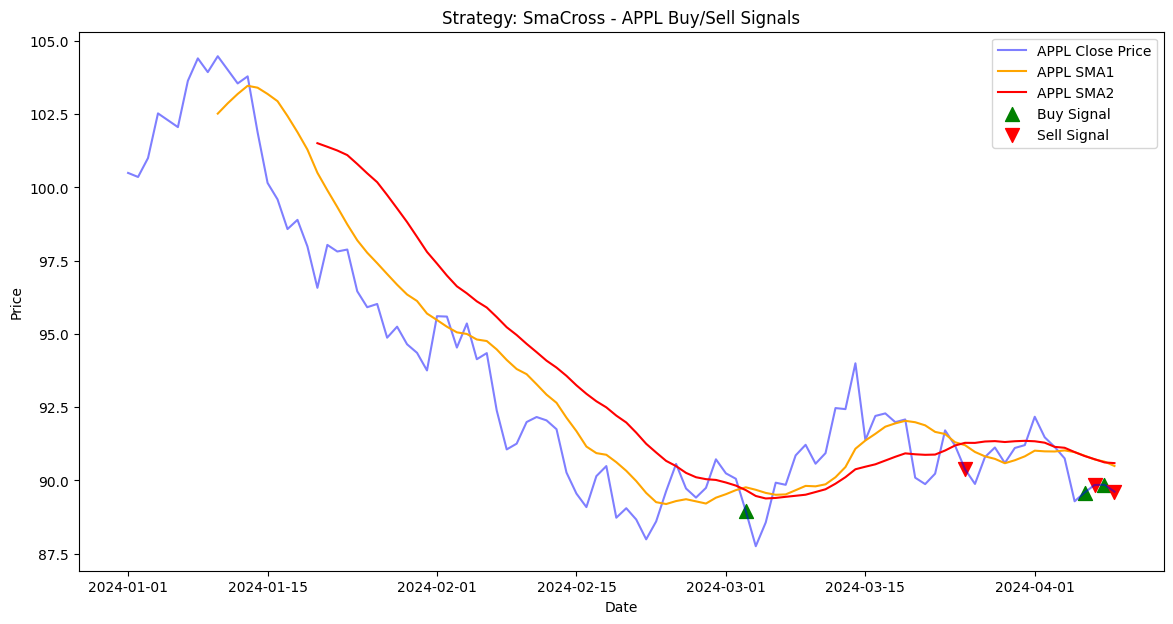

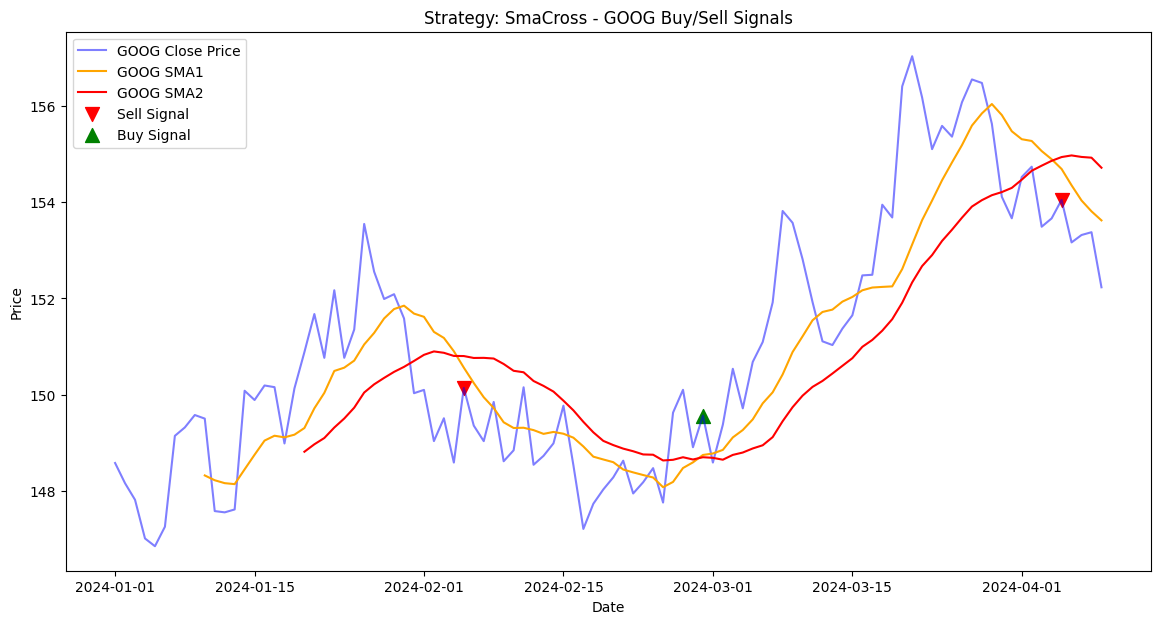

In [14]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

class Strategy:
    def __init__(self, strategy_config, stock_data):
        self.strategy_name = strategy_config['strategy_name']
        self.stocks = strategy_config['stocks']
        self.parameters = strategy_config['parameters']
        self.init_instructions = strategy_config['init']
        self.tick_instructions = strategy_config['ticks']
        self.indicators = {}
        self.positions = {}
        self.stock_data = stock_data  # Simulated stock data dictionary
        self.signals = {}  # To store buy/sell signals per stock
        self.buy_plotted = {}
        self.sell_plotted = {}

    def set_indicator(self, name, indicator_type, input_data, period, stock):
        if indicator_type == "SMA":
            # Calculate the Simple Moving Average using pandas
            self.indicators[stock][name] = self.stock_data[stock][input_data].rolling(window=period).mean()

    def get_indicator(self, name, stock, tick):
        # Return the current value of the indicator at the current tick
        return self.indicators.get(stock, {}).get(name, [None])[tick]

    def evaluate_condition(self, condition, stock, tick):
        condition_type = condition['type']
        left = self.get_indicator(condition['left'], stock, tick)
        right = self.get_indicator(condition['right'], stock, tick)

        if left is None or right is None:
            return False  # If either indicator is None, skip the action

        if condition_type == "crosses_above":
            # Check for a crossover (simplified)
            if tick > 0:
                previous_left = self.get_indicator(condition['left'], stock, tick - 1)
                previous_right = self.get_indicator(condition['right'], stock, tick - 1)
                return previous_left <= previous_right and left > right

        return False

    def execute_init(self, stock):
        for instruction in self.init_instructions:
            if instruction['action'] == "set":
                variable = instruction['variable']
                indicator_type = instruction['indicator']
                input_data = instruction['input']
                period = self.parameters[instruction['period']]
                self.set_indicator(variable, indicator_type, input_data, period, stock)

    def execute_ticks(self, stock):
        stock_length = len(self.stock_data[stock])
        for tick in range(stock_length):
            for tick_instruction in self.tick_instructions:
                condition = tick_instruction['condition']
                actions = tick_instruction['actions']
                if self.evaluate_condition(condition, stock, tick):
                    for action in actions:
                        self.perform_action(action['action'], stock, tick)

    def perform_action(self, action, stock, tick):
        if action == "buy":
            print(f"Stock {stock} - Tick {tick}: Executing Buy Order")
            self.positions[stock].append(("Buy", self.stock_data[stock]['close'][tick]))
            self.signals[stock].append((self.stock_data[stock]['date'][tick], "Buy"))
        elif action == "sell":
            print(f"Stock {stock} - Tick {tick}: Executing Sell Order")
            self.positions[stock].append(("Sell", self.stock_data[stock]['close'][tick]))
            self.signals[stock].append((self.stock_data[stock]['date'][tick], "Sell"))

    def run_strategy(self):
        print(f"Running Strategy: {self.strategy_name}")

        for stock in self.stocks:
            print(f"\nInitializing Strategy for {stock}...")
            self.indicators[stock] = {}
            self.positions[stock] = []
            self.signals[stock] = []
            self.buy_plotted[stock] = False
            self.sell_plotted[stock] = False
            self.execute_init(stock)

            print(f"Executing Ticks for {stock}...")
            self.execute_ticks(stock)

        print("Strategy Execution Completed")

    def plot_signals(self):
        for stock in self.stocks:
            plt.figure(figsize=(14, 7))
            plt.plot(self.stock_data[stock]['date'], self.stock_data[stock]['close'], label=f'{stock} Close Price', color='blue', alpha=0.5)
            plt.plot(self.stock_data[stock]['date'], self.indicators[stock]['sma1'], label=f'{stock} SMA1', color='orange')
            plt.plot(self.stock_data[stock]['date'], self.indicators[stock]['sma2'], label=f'{stock} SMA2', color='red')

            # Plot buy/sell signals
            for signal in self.signals[stock]:
                date, signal_type = signal
                if signal_type == "Buy" and not self.buy_plotted[stock]:
                    plt.scatter(date, self.stock_data[stock].loc[self.stock_data[stock]['date'] == date, 'close'], marker='^', color='green', s=100, label='Buy Signal')
                    self.buy_plotted[stock] = True
                elif signal_type == "Sell" and not self.sell_plotted[stock]:
                    plt.scatter(date, self.stock_data[stock].loc[self.stock_data[stock]['date'] == date, 'close'], marker='v', color='red', s=100, label='Sell Signal')
                    self.sell_plotted[stock] = True
                else:
                    plt.scatter(date, self.stock_data[stock].loc[self.stock_data[stock]['date'] == date, 'close'], marker='^' if signal_type == "Buy" else 'v', color='green' if signal_type == "Buy" else 'red', s=100)

            plt.title(f"Strategy: {self.strategy_name} - {stock} Buy/Sell Signals")
            plt.xlabel('Date')
            plt.ylabel('Price')
            plt.legend()
            plt.show()


# Generate Simulated Stock Data for Multiple Stocks
np.random.seed(42)  # For reproducibility
dates = pd.date_range(start="2024-01-01", periods=100, freq="D")
prices_appl = np.cumsum(np.random.randn(100)) + 100  # Simulated random walk stock prices for APPL
prices_goog = np.cumsum(np.random.randn(100)) + 150  # Simulated random walk stock prices for GOOG

stock_data = {
    'APPL': pd.DataFrame({'date': dates, 'close': prices_appl}),
    'GOOG': pd.DataFrame({'date': dates, 'close': prices_goog})
}

# Example JSON strategy configuration
strategy_json = '''
{
  "strategy_name": "SmaCross",
  "stocks": ["APPL", "GOOG"],
  "parameters": {
    "n1": 10,
    "n2": 20
  },
  "init": [
    {
      "action": "set",
      "variable": "sma1",
      "indicator": "SMA",
      "input": "close",
      "period": "n1"
    },
    {
      "action": "set",
      "variable": "sma2",
      "indicator": "SMA",
      "input": "close",
      "period": "n2"
    }
  ],
  "ticks": [
    {
      "condition": {
        "type": "crosses_above",
        "left": "sma1",
        "right": "sma2"
      },
      "actions": [
        {
          "action": "buy"
        }
      ]
    },
    {
      "condition": {
        "type": "crosses_above",
        "left": "sma2",
        "right": "sma1"
      },
      "actions": [
        {
          "action": "sell"
        }
      ]
    }
  ]
}
'''

# Load and parse the JSON strategy configuration
strategy_config = json.loads(strategy_json)

# Create an instance of the strategy with simulated stock data
strategy = Strategy(strategy_config, stock_data)

# Run the strategy
strategy.run_strategy()

# Plot the signals
strategy.plot_signals()


Running Strategy: SmaCross

Initializing Strategy for APPL...
Executing Ticks for APPL...
Stock APPL - Tick 62: Executing Buy Order
Stock APPL - Tick 84: Executing Sell Order
Stock APPL - Tick 96: Executing Buy Order
Stock APPL - Tick 97: Executing Sell Order
Stock APPL - Tick 98: Executing Buy Order
Stock APPL - Tick 99: Executing Sell Order

Initializing Strategy for GOOG...
Executing Ticks for GOOG...
Stock GOOG - Tick 35: Executing Sell Order
Stock GOOG - Tick 59: Executing Buy Order
Stock GOOG - Tick 95: Executing Sell Order
Strategy Execution Completed


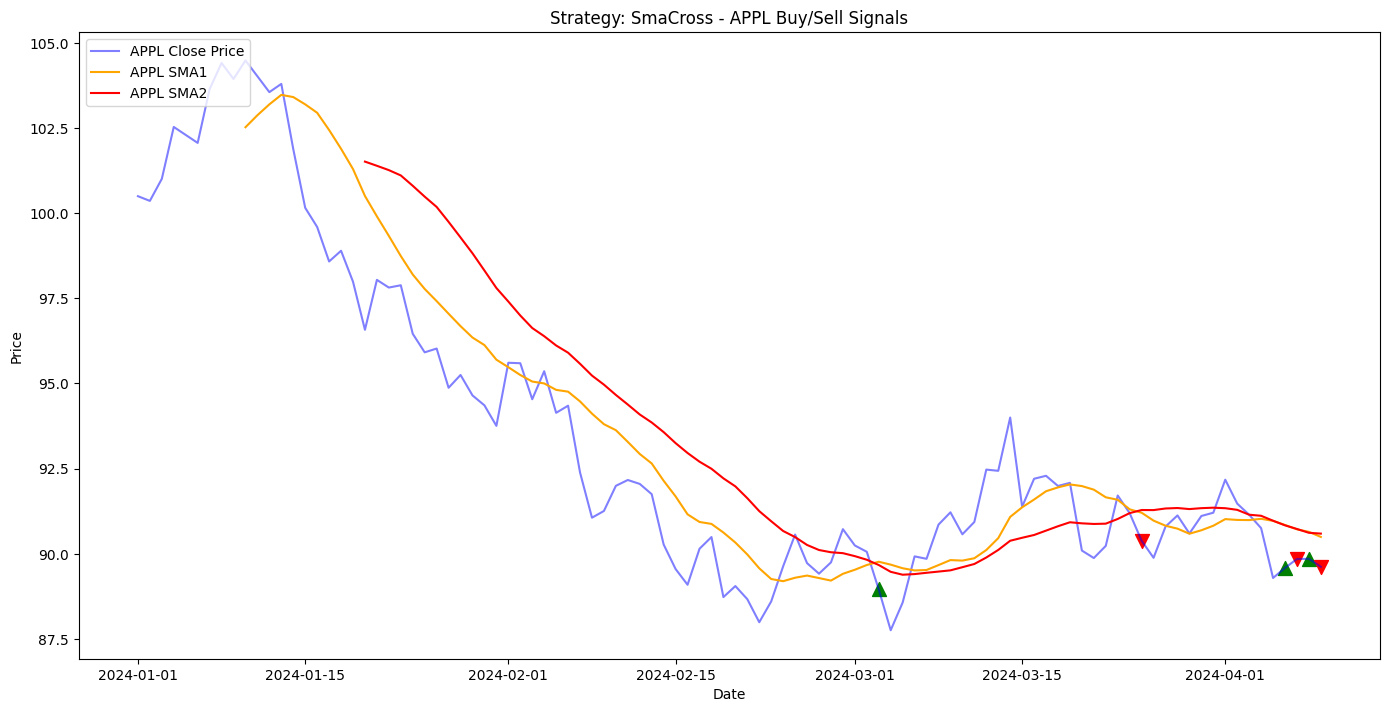

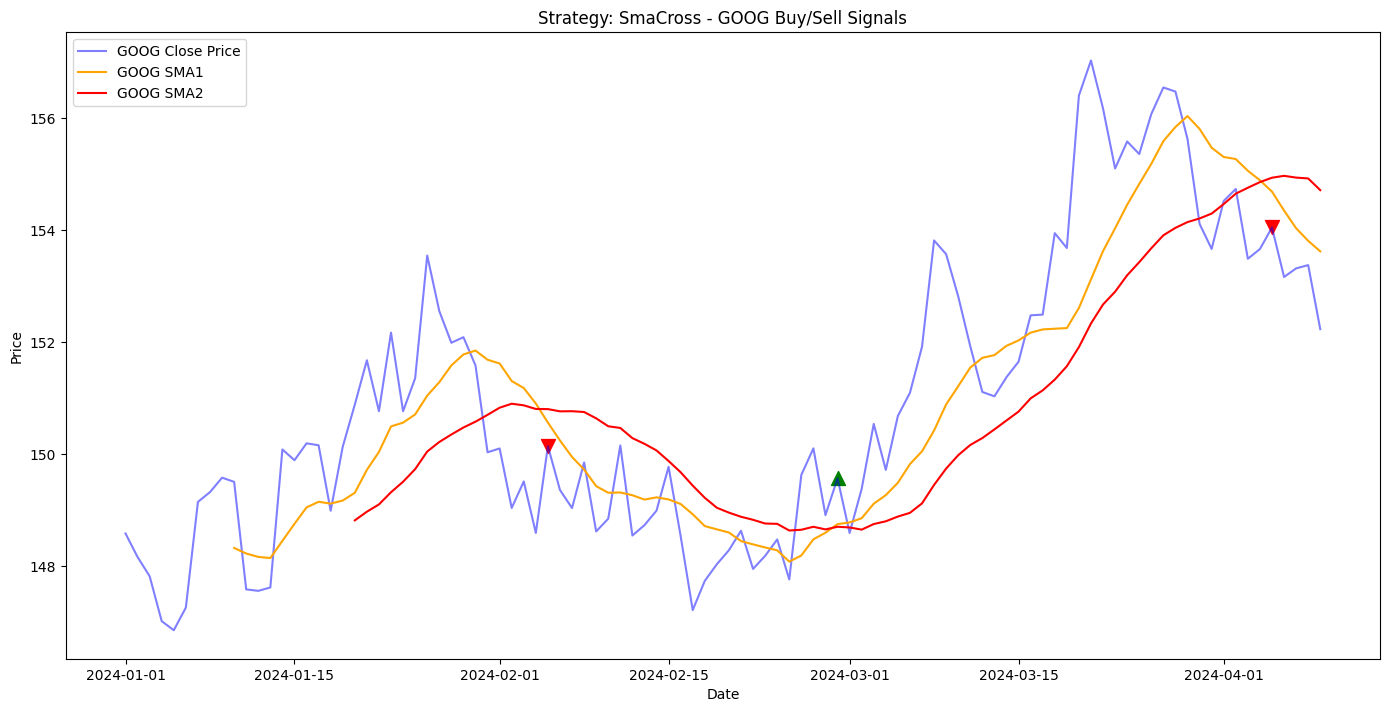

In [17]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

class Strategy:
    def __init__(self, strategy_config, stock_data):
        self.strategy_name = strategy_config['strategy_name']
        self.stocks = strategy_config['stocks']
        self.parameters = strategy_config['parameters']
        self.init_instructions = strategy_config['init']
        self.tick_instructions = strategy_config['ticks']
        self.indicators = {}
        self.positions = {}
        self.stock_data = stock_data  # Simulated stock data dictionary
        self.signals = {}  # To store buy/sell signals per stock
        self.buy_plotted = {}
        self.sell_plotted = {}
        self.rsi_required = any("rsi" in condition['left'] or "rsi" in condition['right'] for tick in self.tick_instructions for condition in [tick['condition']])

    def set_indicator(self, name, indicator_type, input_data, period, stock):
        if indicator_type == "SMA":
            self.indicators[stock][name] = self.stock_data[stock][input_data].rolling(window=period).mean()
        elif indicator_type == "RSI" and self.rsi_required:
            # Calculate RSI using the formula
            delta = self.stock_data[stock][input_data].diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
            rs = gain / loss
            self.indicators[stock][name] = 100 - (100 / (1 + rs))

    def get_indicator(self, name, stock, tick):
        return self.indicators.get(stock, {}).get(name, [None])[tick]

    def evaluate_condition(self, condition, stock, tick):
        condition_type = condition['type']
        left = self.get_indicator(condition['left'], stock, tick)
        right = self.get_indicator(condition['right'], stock, tick)

        if left is None or right is None:
            return False

        if condition_type == "crosses_above":
            if tick > 0:
                previous_left = self.get_indicator(condition['left'], stock, tick - 1)
                previous_right = self.get_indicator(condition['right'], stock, tick - 1)
                return previous_left <= previous_right and left > right

        return False

    def execute_init(self, stock):
        for instruction in self.init_instructions:
            if instruction['action'] == "set":
                variable = instruction['variable']
                indicator_type = instruction['indicator']
                input_data = instruction['input']
                period = self.parameters[instruction['period']]
                self.set_indicator(variable, indicator_type, input_data, period, stock)

    def execute_ticks(self, stock):
        stock_length = len(self.stock_data[stock])
        for tick in range(stock_length):
            for tick_instruction in self.tick_instructions:
                condition = tick_instruction['condition']
                actions = tick_instruction['actions']
                if self.evaluate_condition(condition, stock, tick):
                    for action in actions:
                        self.perform_action(action['action'], stock, tick)

    def perform_action(self, action, stock, tick):
        if action == "buy":
            print(f"Stock {stock} - Tick {tick}: Executing Buy Order")
            self.positions[stock].append(("Buy", self.stock_data[stock]['close'][tick]))
            self.signals[stock].append((self.stock_data[stock]['date'][tick], "Buy"))
        elif action == "sell":
            print(f"Stock {stock} - Tick {tick}: Executing Sell Order")
            self.positions[stock].append(("Sell", self.stock_data[stock]['close'][tick]))
            self.signals[stock].append((self.stock_data[stock]['date'][tick], "Sell"))

    def run_strategy(self):
        print(f"Running Strategy: {self.strategy_name}")

        for stock in self.stocks:
            print(f"\nInitializing Strategy for {stock}...")
            self.indicators[stock] = {}
            self.positions[stock] = []
            self.signals[stock] = []
            self.buy_plotted[stock] = False
            self.sell_plotted[stock] = False
            self.execute_init(stock)

            print(f"Executing Ticks for {stock}...")
            self.execute_ticks(stock)

        print("Strategy Execution Completed")

    def plot_signals(self):
        for stock in self.stocks:
            fig, ax1 = plt.subplots(figsize=(14, 7))

            # Plot price and moving averages
            ax1.plot(self.stock_data[stock]['date'], self.stock_data[stock]['close'], label=f'{stock} Close Price', color='blue', alpha=0.5)
            ax1.plot(self.stock_data[stock]['date'], self.indicators[stock]['sma1'], label=f'{stock} SMA1', color='orange')
            ax1.plot(self.stock_data[stock]['date'], self.indicators[stock]['sma2'], label=f'{stock} SMA2', color='red')

            ax1.set_xlabel('Date')
            ax1.set_ylabel('Price')
            ax1.legend(loc='upper left')

            # Plot buy/sell signals
            for signal in self.signals[stock]:
                date, signal_type = signal
                if signal_type == "Buy" and not self.buy_plotted[stock]:
                    ax1.scatter(date, self.stock_data[stock].loc[self.stock_data[stock]['date'] == date, 'close'], marker='^', color='green', s=100, label='Buy Signal')
                    self.buy_plotted[stock] = True
                elif signal_type == "Sell" and not self.sell_plotted[stock]:
                    ax1.scatter(date, self.stock_data[stock].loc[self.stock_data[stock]['date'] == date, 'close'], marker='v', color='red', s=100, label='Sell Signal')
                    self.sell_plotted[stock] = True
                else:
                    ax1.scatter(date, self.stock_data[stock].loc[self.stock_data[stock]['date'] == date, 'close'], marker='^' if signal_type == "Buy" else 'v', color='green' if signal_type == "Buy" else 'red', s=100)

            # Plot RSI if required by the strategy
            if self.rsi_required:
                ax2 = ax1.twinx()
                ax2.plot(self.stock_data[stock]['date'], self.indicators[stock].get('rsi'), label=f'{stock} RSI', color='purple')
                ax2.set_ylabel('RSI')
                ax2.axhline(70, color='gray', linestyle='--', alpha=0.5)
                ax2.axhline(30, color='gray', linestyle='--', alpha=0.5)

                ax2.legend(loc='upper right')

            fig.tight_layout()
            plt.title(f"Strategy: {self.strategy_name} - {stock} Buy/Sell Signals")
            plt.show()


# Generate Simulated Stock Data for Multiple Stocks
np.random.seed(42)
dates = pd.date_range(start="2024-01-01", periods=100, freq="D")
prices_appl = np.cumsum(np.random.randn(100)) + 100  # Simulated random walk stock prices for APPL
prices_goog = np.cumsum(np.random.randn(100)) + 150  # Simulated random walk stock prices for GOOG

stock_data = {
    'APPL': pd.DataFrame({'date': dates, 'close': prices_appl}),
    'GOOG': pd.DataFrame({'date': dates, 'close': prices_goog})
}

# Example JSON strategy configuration
strategy_json = '''
{
  "strategy_name": "SmaCross",
  "stocks": ["APPL", "GOOG"],
  "parameters": {
    "n1": 10,
    "n2": 20,
    "rsi_period": 14
  },
  "init": [
    {
      "action": "set",
      "variable": "sma1",
      "indicator": "SMA",
      "input": "close",
      "period": "n1"
    },
    {
      "action": "set",
      "variable": "sma2",
      "indicator": "SMA",
      "input": "close",
      "period": "n2"
    },
    {
      "action": "set",
      "variable": "rsi",
      "indicator": "RSI",
      "input": "close",
      "period": "rsi_period"
    }
  ],
  "ticks": [
    {
      "condition": {
        "type": "crosses_above",
        "left": "sma1",
        "right": "sma2"
      },
      "actions": [
        {
          "action": "buy"
        }
      ]
    },
    {
      "condition": {
        "type": "crosses_above",
        "left": "sma2",
        "right": "sma1"
      },
      "actions": [
        {
          "action": "sell"
        }
      ]
    }
  ]
}
'''

# Load and parse the JSON strategy configuration
strategy_config = json.loads(strategy_json)

# Create an instance of the strategy with simulated stock data
strategy = Strategy(strategy_config, stock_data)

# Run the strategy
strategy.run_strategy()

# Plot the signals
strategy.plot_signals()
